In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('../artifacts/raw.csv')
synthetic_df = pd.read_csv('../artifacts/synthetic-data.csv')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7952 non-null   object 
 1   Mode            7952 non-null   object 
 2   Category        7952 non-null   object 
 3   Subcategory     7323 non-null   object 
 4   Note            7440 non-null   object 
 5   Amount          7952 non-null   float64
 6   Income/Expense  7952 non-null   object 
 7   Currency        7952 non-null   object 
dtypes: float64(1), object(7)
memory usage: 497.1+ KB


In [130]:
synthetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5500 non-null   object 
 1   Mode            5500 non-null   object 
 2   Category        5500 non-null   object 
 3   Subcategory     5500 non-null   object 
 4   Note            5500 non-null   object 
 5   Amount          5500 non-null   float64
 6   Income/Expense  5500 non-null   object 
 7   Currency        5500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 343.9+ KB


In [131]:
df = pd.concat([df,synthetic_df], ignore_index= True)

In [132]:
df.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13452 entries, 0 to 13451
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            13452 non-null  object 
 1   Mode            13452 non-null  object 
 2   Category        13452 non-null  object 
 3   Subcategory     12823 non-null  object 
 4   Note            12940 non-null  object 
 5   Amount          13452 non-null  float64
 6   Income/Expense  13452 non-null  object 
 7   Currency        13452 non-null  object 
dtypes: float64(1), object(7)
memory usage: 840.9+ KB


Total of 2,461 Rows of data, and 8 different features.
Date column is object type, no need to change to Date Time, will be dropped.

In [134]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       629
Note              512
Amount              0
Income/Expense      0
Currency            0
dtype: int64

- 521 Null values in Note.
- 635 Null Values in Subcategory

In [135]:
df.groupby('Category')['Subcategory'].value_counts().reset_index()

,Category,Subcategory,count
0,Apparel,Footwear,287
1,Apparel,Clothing,260
2,Apparel,Laundry,20
3,Apparel,Accessories,1
4,Beauty,grooming,310
...,...,...,...
97,subscription,Hotstar,3
98,subscription,Audible,2
99,subscription,Wifi Internet Service,2
100,subscription,OTT Platform,1


# 3

In [136]:
grouped = df.groupby(['Category', 'Subcategory']).size().reset_index(name='count')
sub_cat = grouped.groupby('Category')['Subcategory'].apply(list).to_dict()

In [137]:
sub_cat

{'Apparel': ['Accessories', 'Clothing', 'Footwear', 'Laundry'],
 'Beauty': ['Accessories', 'Makeup', 'grooming'],
 'Culture': ['Books', 'Movie'],
 'Documents': ['Courier', 'Updation'],
 'Education': ['School supplies', 'Stationary'],
 'Family': ['Pocket money',
  'clothes',
  'exam fee',
  'gift',
  'makeup',
  'medicine',
  'misc'],
 'Festivals': ['Diwali', 'Ganesh Pujan', 'Holi', 'Navratri', 'Rakshabandhan'],
 'Food': ['Biscuits',
  'Bread',
  'Dinner',
  'Eating out',
  'Eggs',
  'Grocery',
  'Ice cream',
  'Lunch',
  'Milk',
  'Onions',
  'Potato',
  'Rajgira ladu',
  'Sweets',
  'Tea',
  'Water',
  'beverage',
  'breakfast',
  'chocolate',
  'curd',
  'flour mill',
  'fruits',
  'snacks',
  'vegetables'],
 'Gift': ['Gift'],
 'Grooming': ['Saloon'],
 'Health': ['Health', 'Hospital', 'Lab Tests', 'Medicine'],
 'Household': ['Appliances',
  'Furniture',
  'Hardware',
  'Kirana',
  'Kitchen',
  'Toiletries',
  'gadgets',
  'home decor'],
 'Investment': ['LIC', 'Mutual fund', 'Public P

In [138]:
import random

def impute_subcategory(row):
    if pd.isna(row['Subcategory']):
        options = sub_cat.get(row['Category'], [])
        return random.choice(options) if options else row['Category']
    return row['Subcategory']

df['Subcategory'] = df.apply(impute_subcategory, axis=1)

In [139]:
df.isna().sum()

Date                0
Mode                0
Category            0
Subcategory         0
Note              512
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [140]:
df.drop(columns=['Note'], inplace= True)

In [141]:
df[df.duplicated()]

,Date,Mode,Category,Subcategory,Amount,Income/Expense,Currency
1255,8/6/2017,Cash,Transportation,auto,30.00,Expense,INR
1407,1/5/2017,Cash,Transportation,auto,30.00,Expense,INR
1517,12/3/2017,Cash,Transportation,auto,30.00,Expense,INR
1545,5/3/2017,Cash,Transportation,auto,30.00,Expense,INR
1570,27/02/2017 18:42:27,Cash,Transportation,auto,30.00,Expense,INR
...,...,...,...,...,...,...,...
13447,2025-05-14,Netbanking,subscription,Netflix,199.00,Expense,INR
13448,2025-03-29,Credit Card,Family,Pocket money,4732.04,Expense,INR
13449,2025-04-29,Cash,subscription,Edtech Course,50.21,Expense,INR
13450,2025-04-22,Cash,Transportation,Train,3496.08,Expense,INR


In [142]:
df.Mode.unique()

array(['Cash', 'Saving Bank account 1', 'Credit Card',
       'Equity Mutual Fund B', 'Debit Card', 'Share Market Trading',
       'Saving Bank account 2', 'Equity Mutual Fund C',
       'Equity Mutual Fund A', 'Equity Mutual Fund D', 'Fixed Deposit',
       'Recurring Deposit', 'UPI', 'Netbanking'], dtype=object)

In [143]:
df.loc[pd.isna(df['Subcategory']), 'Subcategory'] = df.loc[pd.isna(df['Subcategory']), 'Category']

In [144]:
df['Subcategory'].isna().sum()

np.int64(0)

In [145]:
df.drop_duplicates(inplace=True)

In [146]:
df.nunique()

Date              1792
Mode                14
Category            50
Subcategory        126
Amount            5615
Income/Expense       3
Currency             1
dtype: int64

- INR is the only unique currency.

# 1

In [147]:
other_cat = df['Category'].value_counts()<18
other_cat_names = other_cat[other_cat].index

df['Category'] = df['Category'].apply(lambda x: 'Other' if x in other_cat_names else x)

In [148]:
df.Mode.unique()

array(['Cash', 'Saving Bank account 1', 'Credit Card',
       'Equity Mutual Fund B', 'Debit Card', 'Share Market Trading',
       'Saving Bank account 2', 'Equity Mutual Fund C',
       'Equity Mutual Fund A', 'Equity Mutual Fund D', 'Fixed Deposit',
       'Recurring Deposit', 'UPI', 'Netbanking'], dtype=object)

Transactions through Bank is most preferred by the people with 49.7% of total transactions, Cash serves as the secondary option with 42.5%. 

In [170]:
for col in df.columns:
    if col in ['Date','Note','Amount']:
        continue
    print(f'Categories in "{col}" variable: {df[col].unique()}')
    print('----------------------------------------------------------------------------')
    

Categories in "Mode" variable: ['Cash' 'Netbanking' 'Credit Card' 'Debit Card' 'UPI']
----------------------------------------------------------------------------
Categories in "Category" variable: ['Transportation' 'Food' 'subscription' 'Festivals' 'Other' 'Family'
 'Apparel' 'Gift' 'Household' 'Beauty' 'Health' 'Money transfer' 'Culture'
 'Tourism' 'Self-development' 'Education' 'Social Life' 'Investment'
 'Recurring Deposit' 'Grooming' 'Public Provident Fund' 'Rent'
 'water (jar /tanker)']
----------------------------------------------------------------------------
Categories in "Subcategory" variable: ['Train' 'snacks' 'Netflix' 'Mobile Service Provider' 'Ganesh Pujan'
 'Tata Sky' 'auto' 'Donation' 'Grocery' 'Lunch' 'Milk' 'Pocket money'
 'Laundry' 'breakfast' 'Gift' 'Dinner' 'Sweets' 'Kirana' 'Ice cream'
 'curd' 'Biscuits' 'Rajgira ladu' 'Navratri' 'train' 'Tea' 'flour mill'
 'Appliances' 'home decor' 'grooming' 'Health' 'Clothing' 'clothes' 'Home'
 'maid' 'chocolate' 'Medicine' '

In [150]:
df.Mode.unique()

array(['Cash', 'Saving Bank account 1', 'Credit Card',
       'Equity Mutual Fund B', 'Debit Card', 'Share Market Trading',
       'Saving Bank account 2', 'Equity Mutual Fund C',
       'Equity Mutual Fund A', 'Equity Mutual Fund D', 'Fixed Deposit',
       'Recurring Deposit', 'UPI', 'Netbanking'], dtype=object)

In [151]:
df['Category'] = df['Category'].replace(
    to_replace= r'Equity Mutual Fund [A-Z]',
    value= 'Mutual Funds',
    regex=True
)

In [152]:
df[df['Mode'].str.contains('bank', case=False, na=False)]

,Date,Mode,Category,Subcategory,Amount,Income/Expense,Currency
2,19/09/2018,Saving Bank account 1,subscription,Netflix,199.00,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,19.00,Expense,INR
7,13/09/2018 21:35:15,Saving Bank account 1,Transportation,Train,40.00,Expense,INR
10,13/09/2018,Saving Bank account 1,Other,Small Cap fund 2,5000.00,Transfer-Out,INR
11,13/09/2018,Saving Bank account 1,Other,Small cap fund 1,5000.00,Transfer-Out,INR
...,...,...,...,...,...,...,...
7926,2025-02-26,Netbanking,Gift,Gift,3462.61,Expense,INR
7937,2025-04-25,Netbanking,Food,Grocery,1473.24,Expense,INR
7939,2025-01-15,Netbanking,Household,Appliances,2302.27,Expense,INR
7945,2025-05-03,Netbanking,Festivals,Holi,2819.07,Expense,INR


# 2

In [153]:
df['Mode'] = df['Mode'].replace(
    to_replace= r'Saving Bank account [0-9]',
    value= 'Netbanking',
    regex=True
)
df['Mode'] = df['Mode'].replace(
    to_replace= r'Equity Mutual Fund [A-Z]',
    value= 'Investment',
    regex=True
)
df['Mode'] = df['Mode'].replace(
    to_replace= 'Share Market Trading',
    value= 'Investment',
    regex=True
)
df['Mode'] = df['Mode'].replace(
    to_replace= 'Fixed Deposit',
    value= 'Investment',
    regex=True
)
df['Mode'] = df['Mode'].replace(
    to_replace= 'Recurring Deposit',
    value= 'Investment',
    regex=True
)


In [154]:
df['TransactionType'] = df['Income/Expense'].replace({
    'Income': 'Income',
    'Expense': 'Expense',
    'Transfer-Out': 'Transfer'
})

In [155]:
df['Date']=df['Date'].str.split(' ').str[0]

In [156]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

df['IsWeekend'] = df['Weekday'].isin(['Sunday','Saturday']).astype(int)



C:\Users\kesha\AppData\Local\Temp\ipykernel_18880\3910743014.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')


C:\Users\kesha\AppData\Local\Temp\ipykernel_18880\3005497117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Income/Expense', palette='Set2')


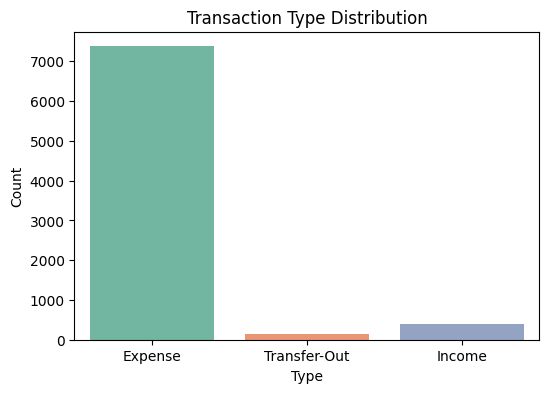

In [157]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Income/Expense', palette='Set2')
plt.title('Transaction Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

C:\Users\kesha\AppData\Local\Temp\ipykernel_18880\829680734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


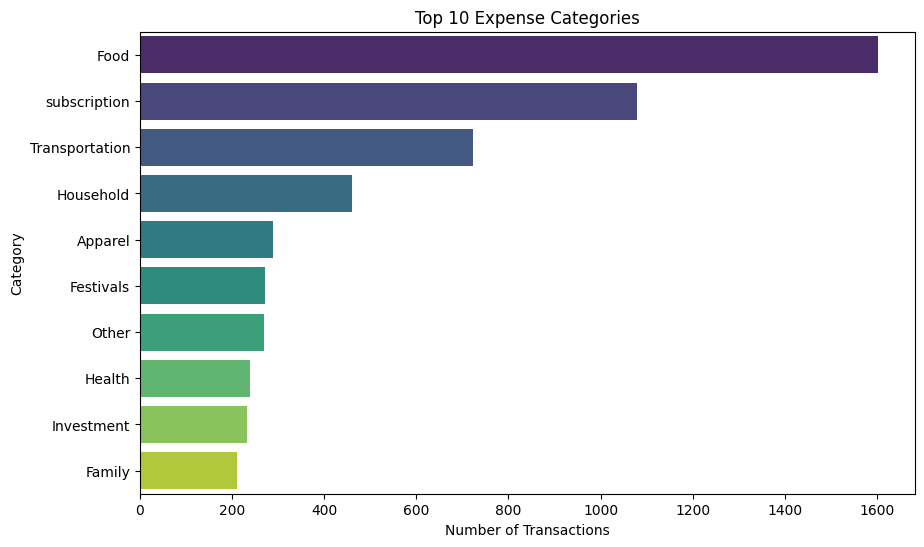

In [158]:
plt.figure(figsize=(10,6))
top_categories = df[df['Income/Expense'] == 'Expense']['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Expense Categories')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()      

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7936 entries, 0 to 7951
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2443 non-null   datetime64[ns]
 1   Mode             7936 non-null   object        
 2   Category         7936 non-null   object        
 3   Subcategory      7936 non-null   object        
 4   Amount           7936 non-null   float64       
 5   Income/Expense   7936 non-null   object        
 6   Currency         7936 non-null   object        
 7   TransactionType  7936 non-null   object        
 8   Year             2443 non-null   float64       
 9   Month            2443 non-null   float64       
 10  Day              2443 non-null   float64       
 11  Weekday          2443 non-null   object        
 12  IsWeekend        7936 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 868.0+ KB


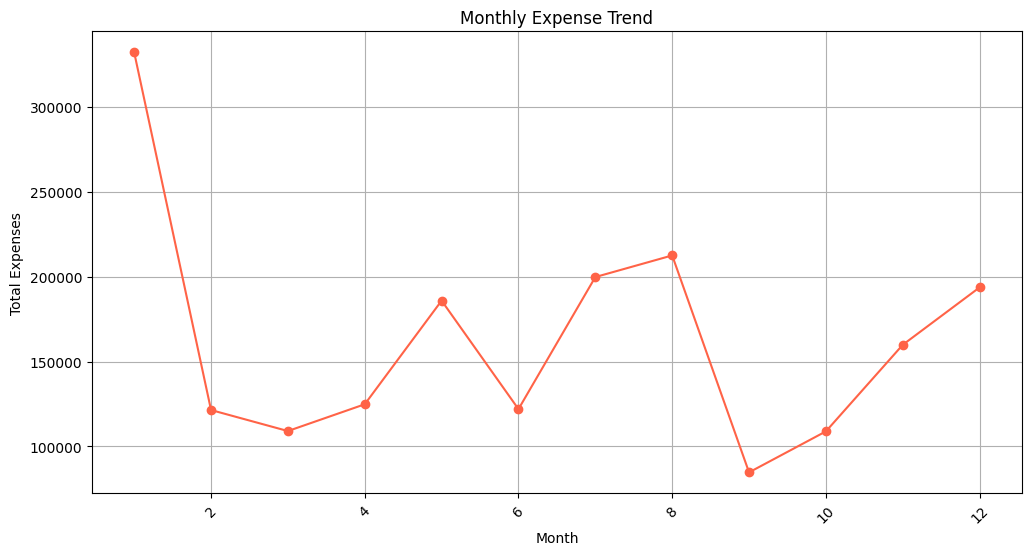

In [160]:
monthly_expense = df[df['Income/Expense'] == 'Expense'].groupby('Month')['Amount'].sum()

plt.figure(figsize=(12,6))
monthly_expense.plot(marker='o', color='tomato')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

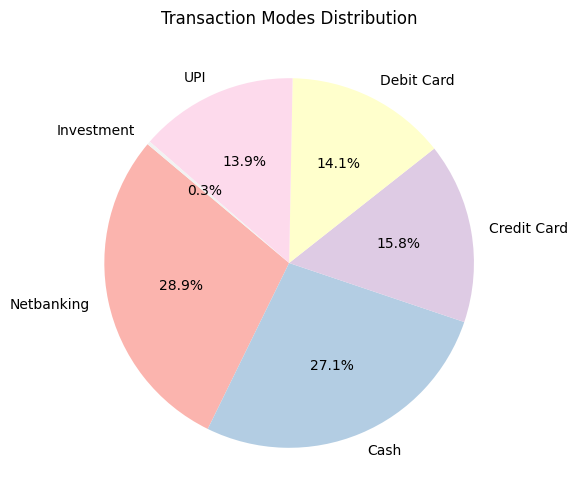

In [161]:
plt.figure(figsize=(6,6))
df['Mode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='Pastel1')
plt.title('Transaction Modes Distribution')
plt.ylabel('')
plt.show()

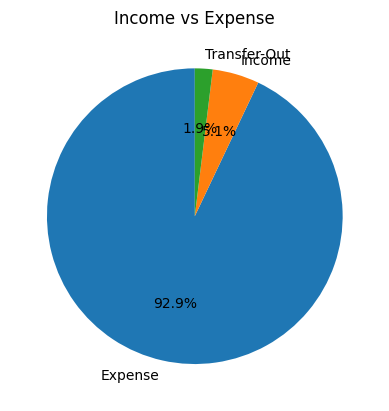

In [162]:
df['Income/Expense'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Income vs Expense')
plt.ylabel('')
plt.show()

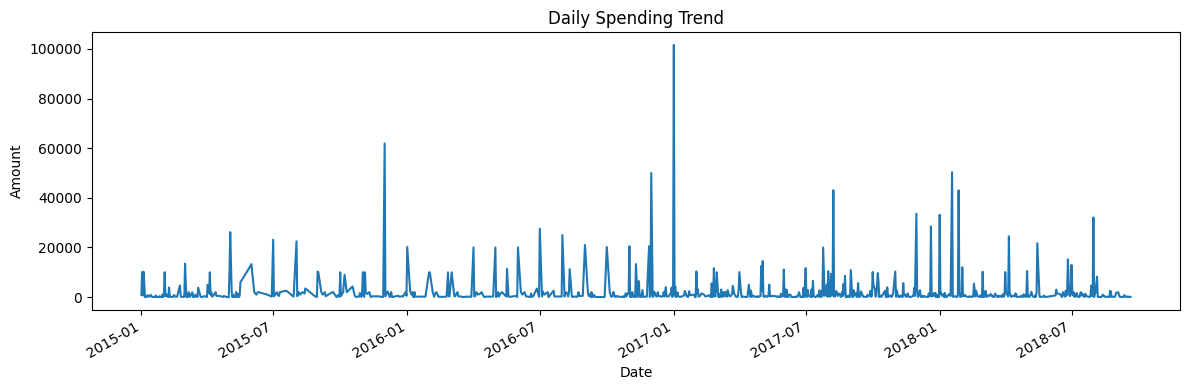

In [163]:
df_daily = df[df['Income/Expense']=='Expense'].groupby('Date')['Amount'].sum()

df_daily.plot(figsize=(12, 4), title='Daily Spending Trend')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


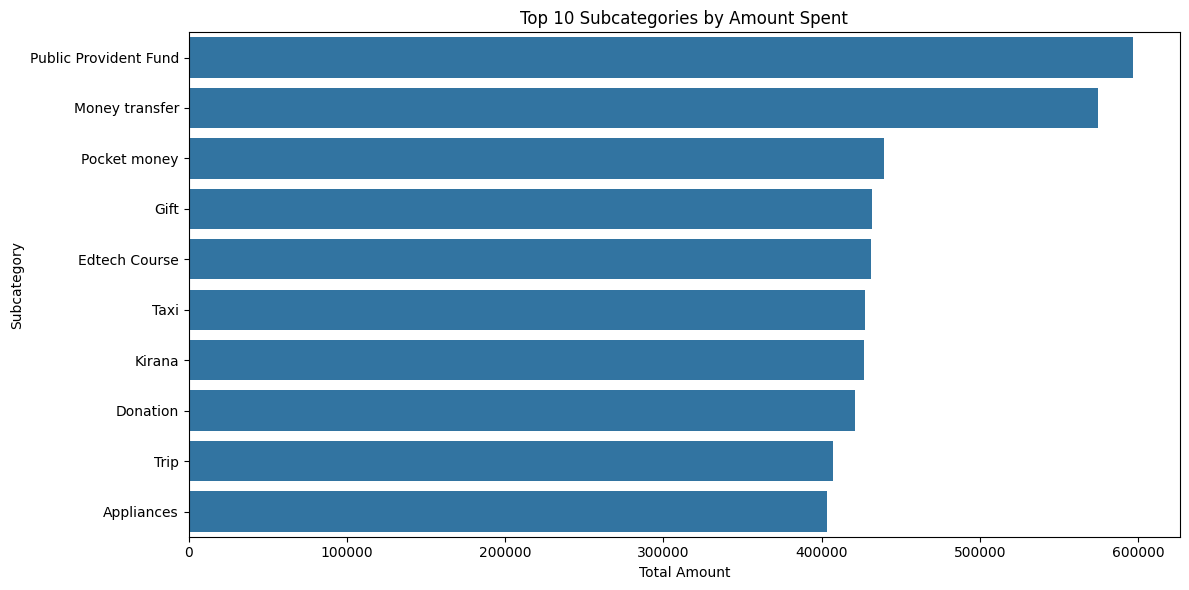

In [164]:
plt.figure(figsize=(12, 6))
top_subcat = df[df['Income/Expense'] == 'Expense'].groupby('Subcategory')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_subcat.values, y=top_subcat.index)
plt.title('Top 10 Subcategories by Amount Spent')
plt.xlabel('Total Amount')
plt.ylabel('Subcategory')
plt.tight_layout()
plt.show()


In [165]:
df[df['Income/Expense'] == 'Expense'].groupby('Subcategory')['Amount'].sum().sort_values(ascending=False).tail(30)

Subcategory
Laundry             1515.00
Tea                 1505.00
Sweets              1432.00
beverage            1371.00
Hotstar             1243.49
Rakshabandhan       1000.00
Water                925.00
gadgets              799.00
Cable TV             783.00
Petrol               782.00
Bread                685.00
Kindle unlimited     676.00
Ganesh Pujan         612.00
Biscuits             597.00
Accessories          530.00
makeup               525.00
Audible              398.00
Potato               370.00
Onions               366.00
ropeway              353.00
curd                 345.00
Entry Fees           308.85
medicine             300.00
OTT Platform         300.00
chocolate            216.00
Books                140.00
garbage disposal      67.00
Courier               50.00
Updation              50.00
School supplies       20.00
Name: Amount, dtype: float64

In [166]:
df[df['Category']== 'Transportation'].groupby('Category')['Subcategory'].value_counts().reset_index()

,Category,Subcategory,count
0,Transportation,auto,288
1,Transportation,Train,196
2,Transportation,Taxi,168
3,Transportation,train,25
4,Transportation,Travels,21
5,Transportation,Bus,19
6,Transportation,Bike,14
7,Transportation,Petrol,4
8,Transportation,ropeway,2


In [167]:
df = df[df['Income/Expense'] == 'Expense']

In [169]:
df['Subcategory'].reset_index()

,index,Subcategory
0,0,Train
1,1,snacks
2,2,Netflix
3,3,Mobile Service Provider
4,4,Ganesh Pujan
...,...,...
7371,7947,Netflix
7372,7948,Pocket money
7373,7949,Edtech Course
7374,7950,Train
